# E5. 나랑 닯은 연예인 찾기

### Step 1. 내 사진 찍고 임베딩 거리 구해보기

* 내 사진 3장을 클라우드에 업로드 시켰다. 
* 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.


#### 필요한 모듈 받기

In [2]:
import os
import face_recognition as fr
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#### 내 사진들끼리 얼굴 임베딩 벡터 거리 구해보기 

In [25]:
dir_path_bo = os.getenv('HOME') + '/aiffel/Exploration/E5/Images/Self'

In [22]:
# crop face

def get_cropped_face(image_path): 
    image = fr.load_image_file(image_path)
    face_locations = fr.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b,:]
    return cropped_face
    

In [23]:
# face embedding

def get_face_embedding(face):
    return fr.face_encodings(face)

In [27]:
# face embedding for all pictures in the folder and make a dictionary format 

def get_face_embedding_dict_bo(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

embedding_dict_bo = get_face_embedding_dict_bo(dir_path_bo)

In [28]:
print(embedding_dict_bo.keys())

dict_keys(['bo2', 'bo1', 'bo3'])


In [29]:
# distance function 

def get_distance_bo(name1, name2):
    return np.linalg.norm(embedding_dict_bo[name1]-embedding_dict_bo[name2], ord=2)

In [31]:
# distance b/w bo1 and bo2 pictures 
print("Distance between bo1 and bo2 images:", get_distance_bo('bo1', 'bo2'))
print("Distance between bo2 and bo3 images:", get_distance_bo('bo2', 'bo3'))
print("Distance between bo1 and bo3 images:", get_distance_bo('bo1', 'bo3'))


Distance between bo1 and bo2 images: 0.3661631209350996
Distance between bo2 and bo3 images: 0.3659585671543007
Distance between bo1 and bo3 images: 0.43209408381564096


### Step2.  여자 연예인 얼굴 영역 자르기

1. 팀원들과 같이 연예인 사진 80장 모으기. 
2. 모은 사진 얼굴 영역을 잘라줘야 합니다. 
    1) 노드의 get_crop_face 함수를 썼다. 
    2) 에러가 발생. 사진중에 face detection이 안돼는 사진이 있는것으로 추정됐다. 
    3) try/except를 이용해서 문제가 되는 사진을 알아냈고, 디렉토리에서 지웠다. 
3. cropped 된 사진은 Others_cropped 디렉토리에 따로 저장해 주었다. 

In [2]:
# file list 만들기 

dir_path_others = os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others'

file_list = os.listdir(dir_path_others)
file_list[5]

'SoeunKim.jpg'

In [4]:
# crop 함수 만들어서 모든 파일에 적용하기 try/except사용 

for file in file_list:
    img_path = os.path.join(dir_path_others, file)
    image = fr.load_image_file(img_path)  
     
    try:
        face_locations = fr.face_locations(image)
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        pillow_image = Image.fromarray(cropped_face)
        pillow_image.save(os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others_cropped/'+file)
    
    except:
        print('예외가 발생했습니다: ', file)
    

In [13]:
# cropped images 들어있는 디렉토리에서 cropped image 리스트 만들기 

path_others_cropped = os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others_cropped'
cropped_list = os.listdir(path_others_cropped)
print(cropped_list[:10])

['MYPark.jpg', 'YRPark.jpg', 'JAPark.jpg', 'ChoHee Lee.jfif', 'JIYPark.jpg', 'SoeunKim.jpg', 'SDPark.jpg', 'SungryeongKim.jpg', 'Chunga Lee.jfif', 'NYLee.jpg']


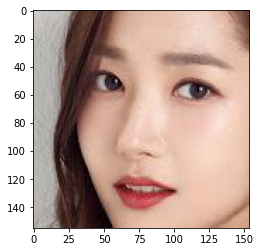

In [14]:
# 실제로 얼굴이 crop 이 잘 돼었는지 이미지로 확인 

sample = fr.load_image_file(os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others_cropped/MYPark.jpg')
plt.imshow(sample)

### Step3. 얼굴 영역의 임베딩 추출하기

In [15]:
# face embedding 딕셔너리 함수 만들기 

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        image = fr.load_image_file(img_path)  
        embedding = fr.face_encodings(image)

        if len(embedding) > 0:  
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict


In [16]:
# face embedding 딕셔너리 만들기 

embedding_dict = get_face_embedding_dict(path_others_cropped)

In [19]:
# sample 확인 

embedding_dict['MYPark']

array([-0.07966222,  0.07197294,  0.06098748, -0.07405034, -0.12444367,
        0.01027101, -0.12496144, -0.07042797,  0.1398977 , -0.14195195,
        0.14588806, -0.06949885, -0.2180225 , -0.02255455, -0.0603843 ,
        0.23997335, -0.14760341, -0.15318735, -0.04229129,  0.02906929,
        0.02653649,  0.05991495, -0.01540644,  0.02324312, -0.13251117,
       -0.336061  , -0.1083572 , -0.02315741, -0.08061645, -0.04739088,
       -0.08031431,  0.0921221 , -0.18014148, -0.00888554,  0.03081481,
        0.09838092,  0.00230153, -0.05935418,  0.12701967,  0.01680479,
       -0.28780484,  0.08121908,  0.09008082,  0.24417935,  0.20009319,
       -0.01733709,  0.00343683, -0.13958362,  0.07257669, -0.17688063,
       -0.00642687,  0.15920952,  0.0128445 ,  0.05094583,  0.00578545,
       -0.0866721 ,  0.05203586,  0.12670943, -0.1242779 ,  0.01788118,
        0.12973854, -0.10599138, -0.02603876, -0.11817408,  0.21815519,
        0.08324721, -0.11535276, -0.25349486,  0.07978594, -0.15

### Step4. 모은 연예인들과 비교하기
1. 내 사진을 딕셔너리에 추가하기. 
2. 모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

In [33]:
embedding_dict['bo1'] = embedding_dict_bo['bo1']
embedding_dict['bo2'] = embedding_dict_bo['bo2']
embedding_dict['bo3'] = embedding_dict_bo['bo3']

In [34]:
# 이미지 사이의 거리 구하는 함수 

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [35]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [36]:
# 특정 이미지와 가장 가까운 top 5 이미지 구하는 함수  
# lambda 함수가 정렬 key로 활용됩니다.

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [37]:
# 나의 사진과 비교 (bo1)

get_nearest_face('bo1')

순위 1 : 이름(bo2), 거리(0.3661631209350996)
순위 2 : 이름(bo3), 거리(0.43209408381564096)
순위 3 : 이름(jimin), 거리(0.4744858312951204)
순위 4 : 이름(Sunbin Lee), 거리(0.4787090832480153)
순위 5 : 이름(DHLee), 거리(0.4803732728581839)


In [38]:
# 나의 사진과 비교 (bo2)

get_nearest_face('bo2')

순위 1 : 이름(bo3), 거리(0.3659585671543007)
순위 2 : 이름(bo1), 거리(0.3661631209350996)
순위 3 : 이름(SHPark), 거리(0.39751405829883313)
순위 4 : 이름(Juyoung Lee), 거리(0.40056350737758495)
순위 5 : 이름(jimin), 거리(0.40441481499653636)


In [39]:
# 나의 사진과 비교 (bo3)

get_nearest_face('bo3')

순위 1 : 이름(bo2), 거리(0.3659585671543007)
순위 2 : 이름(SYPark), 거리(0.3724055584747787)
순위 3 : 이름(HJPark), 거리(0.38385796157752733)
순위 4 : 이름(DHLee), 거리(0.3994144903282331)
순위 5 : 이름(Juyoung Lee), 거리(0.4119142832593329)


### 결과
가장 닮은 연예인이 내 사진에 따라서 다르다는것을 확인 할 수 있었습니다. 과연 거리가 가장 가까운 사람은?! 두구두구두구두구...   
1위: 이름(SYPark - 박소이), 거리(0.3724055584747787)    
2위: 이름(HJPark), 거리(0.38385796157752733)     
3위: 이름(SHPark - 박소현), 거리(0.39751405829883313)     

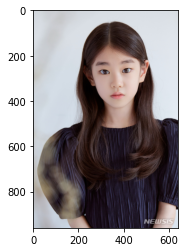

In [40]:
# 1등 - 안닮았어요.. 
park_path = os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others/SYPark.jpg'
park = fr.load_image_file(park_path)  
plt.imshow(park)

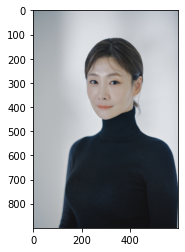

In [41]:
# 2등  - 처음보는 얼굴인데 1등과 너무도 다르게 생겼습니다.. 아무래도 제 세번째 사진이 문제인듯 하네요. 
park_path2 = os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others/HJPark.jpg'
park2 = fr.load_image_file(park_path2)  
plt.imshow(park2)

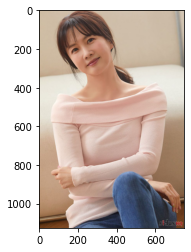

In [42]:
# 궁금하니깐 제 2번째 사진과 닮은 연예인 한번더 볼께요. 이게 중독성이 있네요.. 어떻게 됀게 다 박씨죠.. 

park_path3 = os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others/SHPark.jpg'
park3 = fr.load_image_file(park_path3)  
plt.imshow(park3)


### Step5. 다양한 재미있는 시각화 시도해 보기
비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.

In [52]:
from PIL import Image, ImageDraw, ImageFont
import sys


In [41]:
park_path4 = os.getenv('HOME')+'/aiffel/Exploration/E5/Images/Others/SHPark.jpg'

Format: None
Size: (750, 1125)
Mode: RGB


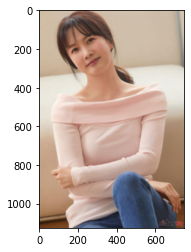

In [65]:
# show() 함수가 작동이 안돼서 overstack에서 얘기한 대로 sudo apt-get install imagemagick 를 해보았으나 여전히 안됐다. 
# 그래서 그냥 plt로 이미지를 보여줬는데 별로 blur도 안됐것 같다. 다음에는 다른 방법을 고안해 봐야겠다. 
try:
    img = Image.open(park_path4)
    
except IOError:
    print("Unable to load image")    
    sys.exit(1)

blurred = img.filter(ImageFilter.BLUR)

blurred.save('park4_blurred.jpg')  # os.getenv('HOME')+'/aiffel/Exploration/E5

print("Format: {0}\nSize: {1}\nMode: {2}".format(blurred.format, 
    blurred.size, blurred.mode))

path_blur = os.getenv('HOME')+'/aiffel/Exploration/E5/park4_blurred.jpg'
blur = fr.load_image_file(path_blur)  
plt.imshow(blur)

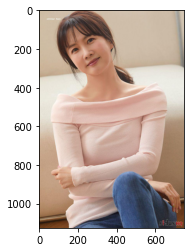

In [64]:
# 왼쪽 상단에 아주 조그맣게 watermark 가 생겼다. font를 조정해 보려고 했으나 계속 에러가 떠서 포기. 
try:
    park4 = Image.open(park_path4)

except:
    print("Unable to load image")
    sys.exit(1)
    
draw = ImageDraw.Draw(park4)
text = "similar face"

draw.text((40, 40), text)
park4.save('park4_watermarked.jpg')

path_watermark = os.getenv('HOME')+'/aiffel/Exploration/E5/park4_watermarked.jpg'
watermark = fr.load_image_file(path_watermark)  
plt.imshow(watermark)